<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/predicciones-de-ventas/blob/main/Ejercicio_de_ingenier%C3%ADa_de_caracter%C3%ADsticas_(base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd

In [144]:
filename = "/content/drive/MyDrive/Data CodingDojo/bikeshare_train - bikeshare_train.csv"
df = pd.read_csv(filename)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Eliminacion de columnas redundantes**

In [145]:
df.drop(columns=["casual","registered"], inplace=True)

Transforma la columna de fecha y hora en un tipo de fecha hora y utilízalo para crear 3 columnas nuevas en el dataframe que contenga:

  1. Nombre del mes   2. Nombre del día de la semana   3. Hora del día

   Asegúrate que todas las 3 nuevas columnas son un tipo de datos “objeto” para que se más tarde se le aplica una codificación one-hot.  
  2. Elimina las columnas “datetime” y “season”.  Estas son ahora redundantes. 

In [146]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [147]:
df['month_name'] = df['datetime'].dt.month_name()
df['weekday_name'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df.drop(columns=["datetime","season"], inplace=True)
df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month_name,weekday_name,hour
0,0,0,1,9.84,14.395,81,0.0,16,January,Saturday,0
1,0,0,1,9.02,13.635,80,0.0,40,January,Saturday,1
2,0,0,1,9.02,13.635,80,0.0,32,January,Saturday,2
3,0,0,1,9.84,14.395,75,0.0,13,January,Saturday,3
4,0,0,1,9.84,14.395,75,0.0,1,January,Saturday,4


In [148]:
df["hour"] = df['hour'].astype("object")

Las temperaturas en la columna “temp” y “atemp” son en Celsius. Utiliza .apply() para convertirlas en Fahrenheit.

In [149]:
def celsius_fah(temp):
  fahrenheit = temp *(9/5)+32
  return fahrenheit

df["temp"] = df["temp"].apply(celsius_fah)
df["atemp"] = df["atemp"].apply(celsius_fah)

In [150]:
df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month_name,weekday_name,hour
0,0,0,1,49.712,57.911,81,0.0,16,January,Saturday,0
1,0,0,1,48.236,56.543,80,0.0,40,January,Saturday,1
2,0,0,1,48.236,56.543,80,0.0,32,January,Saturday,2
3,0,0,1,49.712,57.911,75,0.0,13,January,Saturday,3
4,0,0,1,49.712,57.911,75,0.0,1,January,Saturday,4


In [151]:
df["temp_variance"] = df["temp"] - df["atemp"]
df.drop(columns="atemp", inplace=True)
df.head()

,holiday,workingday,weather,temp,humidity,windspeed,count,month_name,weekday_name,hour,temp_variance
0,0,0,1,49.712,81,0.0,16,January,Saturday,0,-8.199
1,0,0,1,48.236,80,0.0,40,January,Saturday,1,-8.307
2,0,0,1,48.236,80,0.0,32,January,Saturday,2,-8.307
3,0,0,1,49.712,75,0.0,13,January,Saturday,3,-8.199
4,0,0,1,49.712,75,0.0,1,January,Saturday,4,-8.199


###**Preparacion para Machine Learning**

In [152]:
df.isna().sum()

holiday          0
workingday       0
weather          0
temp             0
humidity         0
windspeed        0
count            0
month_name       0
weekday_name     0
hour             0
temp_variance    0
dtype: int64

In [153]:
df = df[~df.duplicated()]

**Con el codigo anterior, nos aseguramos de que el conjunto de datos no tiene ningun registro nulo, ni tampoco cuenta con registros duplicados.**

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   holiday        10885 non-null  int64  
 1   workingday     10885 non-null  int64  
 2   weather        10885 non-null  int64  
 3   temp           10885 non-null  float64
 4   humidity       10885 non-null  int64  
 5   windspeed      10885 non-null  float64
 6   count          10885 non-null  int64  
 7   month_name     10885 non-null  object 
 8   weekday_name   10885 non-null  object 
 9   hour           10885 non-null  object 
 10  temp_variance  10885 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1020.5+ KB


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [156]:
X = df.drop(columns="count")
y = df["count"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [157]:
cat_selector = make_column_selector(dtype_include = "object")
num_selector = make_column_selector(dtype_include = "number")

In [158]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = "ignore")

In [159]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [160]:
col_transformer = make_column_transformer(num_tuple, cat_tuple)
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa755cae910>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa753f66430>)])

In [161]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

##Linear Regression

In [162]:
reg = LinearRegression()
reg.fit(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.6294823992126615


## RandomForest

In [163]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [164]:
rf = RandomForestRegressor(random_state=10, max_depth = 30)
rf.fit(X_train_processed, y_train)
rf_score = rf.score(X_test_processed, y_test)
print(rf_score)

0.82693796568549


Luego de aplicar regresion linear y arbol de regresion, se aprecia que tras la ingenieria de caracteristicas aplicadas

A continuacion se muestra el resultado obtenido con el modelo de random forest en el conjunto de datos sin aplicar la ingenieria de caracteristicas.
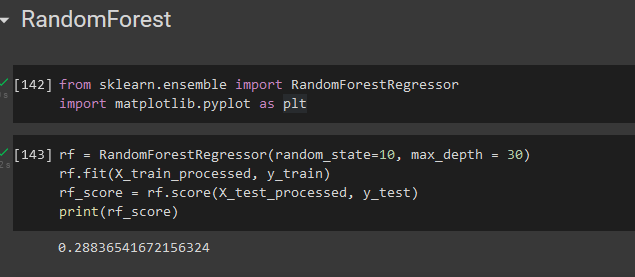